<div align="center">
    <font color="0F5298" size="7">
        Deep Learning <br>
    </font>
    <font color="2565AE" size="5">
        Electrical Engingineering Department <br>
        Fall 2025 - Prof. Fatemizadeh <br>
    </font>
    <font color="3C99D" size="5">
        HW3 Practical <br>
    </font>
    <font color="696880" size="5">
        200 Points
    </font>
</div>


*   For submission, please upload the completed notebook file along with the exported .html version that includes all code outputs and results.

*   If you are using Google Colab, it is recommended to run the notebook with a T4 GPU.

Name = "Ali Amjadi"

Student_Number = "404205889"

#**Question 2: Implementation of MobileFaceNet**

MobileFaceNet is a lightweight neural network designed for efficient face recognition on mobile and embedded devices, addressing the limitations of traditional models that require high computational resources. Built upon MobileNet principles, it uses depthwise separable convolutions to reduce computation while achieving competitive performance on large-scale benchmarks. Its compact and efficient design makes it suitable for applications such as mobile authentication, attendance systems, smart surveillance, and edge-based identity verification.


<div style="text-align: center;">
    <img src="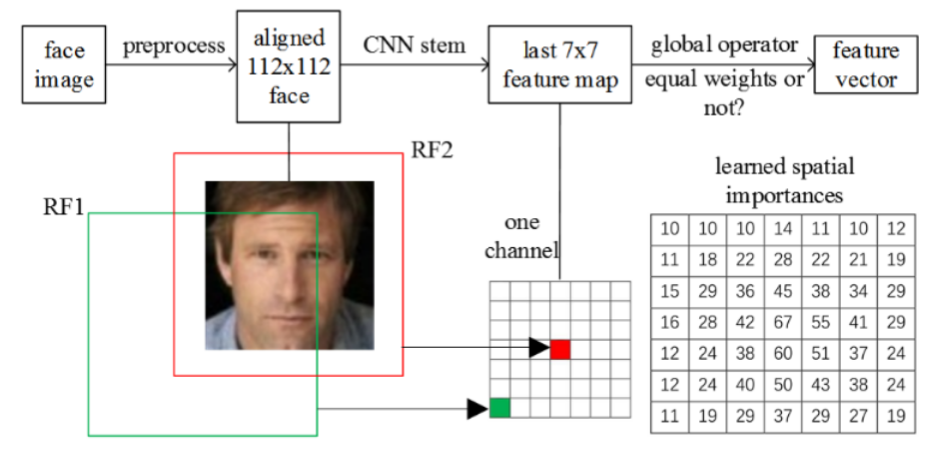
" width="600">
</div>


The architecture of MobileFaceNet is optimized for generating compact and discriminative face embeddings. It follows a streamlined, bottleneck-based design that uses depthwise separable convolutions and residual connections to efficiently extract features from aligned facial images. The network begins with an initial convolutional layer for low-level feature extraction, followed by multiple bottleneck blocks that progressively refine spatial and semantic information.

A key component of MobileFaceNet is the use of depthwise convolutions, which factorize standard convolutions into separate spatial and channel operations. This significantly reduces the number of parameters and floating-point operations while preserving the network’s representational power. The architecture also incorporates linear bottlenecks and inverted residual blocks, enabling the model to maintain high performance despite its compactness.

At the end of the network, a global depthwise convolutional layer aggregates spatial information into a fixed-length feature vector. This embedding is typically normalized and used with a metric-learning loss function, such as ArcFace or CosFace, during training. The final output is a high-quality feature representation that can be used for face verification or identification.

This assignment focuses on understanding and implementing the MobileFaceNet architecture, analyzing how its lightweight design achieves efficiency, and exploring how the final embeddings can be used for practical face verification tasks.

For more information, please refer to the paper: <br>
 [Mobilefacenets: Efficient cnns for accurate real-time face verification on mobile devices (2018)](https://arxiv.org/pdf/1804.07573)

## Installing dependencies

In [ ]:
# Install RetinaFace and dependencies
!pip install retina-face
!pip install opencv-python


##Importing the required libraries

In [ ]:
import os
import cv2
from retinaface import RetinaFace
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm



In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


RetinaFace is a single-stage face detector designed to accurately locate human faces and key facial landmarks in images. Unlike traditional multi-stage detection pipelines, RetinaFace performs face localization and landmark regression simultaneously, making it both fast and highly reliable. Its architecture is based on a feature pyramid network (FPN) combined with a ResNet backbone, allowing it to detect faces across a wide range of scales and poses.

A key strength of RetinaFace is its use of supervised and self-supervised multi-task learning. In addition to predicting bounding boxes, the model also outputs five facial landmarks (eyes, nose, and mouth corners). This additional supervision significantly improves detection accuracy, especially under challenging conditions such as occlusion, extreme poses, and low resolution.

RetinaFace is widely used in various face-related tasks because it provides robust and consistent face alignment, which serves as an essential preprocessing step for downstream tasks such as face recognition, expression analysis, and identity verification. By ensuring that detected faces are properly localized and aligned, RetinaFace improves the performance and reliability of subsequent models.

In this assignment, we do not train RetinaFace from scratch. Instead, we use a pretrained model solely for face detection and alignment, allowing us to focus on the main objectives of the exercise without the heavy computational cost of training a complex detector.

For more information, please refer to the paper: <br>
 [Retinaface: Single-shot multi-level face localisation in the wild (2020)](https://openaccess.thecvf.com/content_CVPR_2020/papers/Deng_RetinaFace_Single-Shot_Multi-Level_Face_Localisation_in_the_Wild_CVPR_2020_paper.pdf)

##Testing the functionality of RetinaFace

In [ ]:
# Load an image
img_path = "/content/drive/MyDrive/sample.jpg"  # Sample image
img = cv2.imread(img_path)

# Detecting faces
detections = RetinaFace.detect_faces(img_path)

detections

25-12-08 04:36:54 - Directory /root/.deepface created
25-12-08 04:36:54 - Directory /root/.deepface/weights created
25-12-08 04:36:54 - retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5
100%|██████████| 119M/119M [00:01<00:00, 95.3MB/s]


{'face_1': {'score': np.float64(0.9993626475334167),
  'facial_area': [np.int64(82), np.int64(61), np.int64(131), np.int64(122)],
  'landmarks': {'right_eye': [np.float32(95.55433), np.float32(86.40243)],
   'left_eye': [np.float32(118.953255), np.float32(84.593796)],
   'nose': [np.float32(108.26797), np.float32(96.45548)],
   'mouth_right': [np.float32(99.773384), np.float32(109.54146)],
   'mouth_left': [np.float32(117.66432), np.float32(108.19933)]}}}

(np.float64(-0.5), np.float64(48.5), np.float64(60.5), np.float64(-0.5))

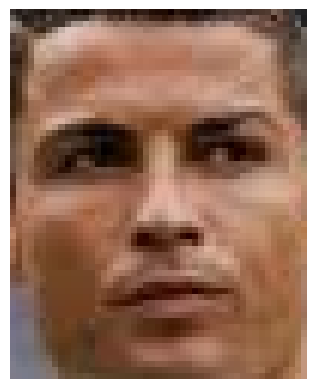

In [ ]:
def extract_face(img, detection):
    """
    Crop and align face according to RetinaFace output.
    """
    facial_area = detection["facial_area"]
    x1, y1, x2, y2 = facial_area
    face = img[y1:y2, x1:x2]
    return face

# Example
first_face = list(detections.values())[0]
face_img = extract_face(img, first_face)

plt.imshow(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

##Converting image (10 Points)
Convert the RetinaFace output into an input format compatible with MobileFaceNet

(np.float64(-0.5), np.float64(111.5), np.float64(111.5), np.float64(-0.5))

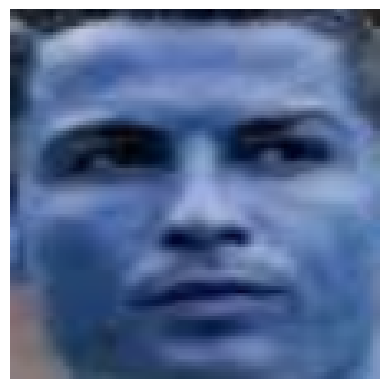

In [ ]:
def preprocess_for_mobilefacenet(face):
    # TO DO

    face = np.array(face)

    # Resize to 112x112
    face_resized = cv2.resize(face, (112, 112))

    # Convert to RGB
    face_rgb = cv2.cvtColor(face_resized, cv2.COLOR_BGR2RGB)

    # Normalize to [0,1]
    face_normalized = face_rgb / 255.0
    return face_resized

aligned_face = preprocess_for_mobilefacenet(face_img)

plt.imshow(aligned_face)
plt.axis('off')

##MobileFaceNet

The table below shows MobileFaceNet architecture for feature embedding. Each line describes a sequence of operators repeated $n$ times. All layers within the same sequence share the same number $c$ of output channels. The first layer of each sequence uses a stride $s$, while all subsequent layers use stride $1$. All spatial convolutions in the bottleneck blocks employ $3 \times 3$ kernels, and the expansion factor $t$ is always applied to the input size. GDConv7×7 denotes a global depthwise convolution with a $7 \times 7$ kernel.


<div style="text-align: center;">
    <img src="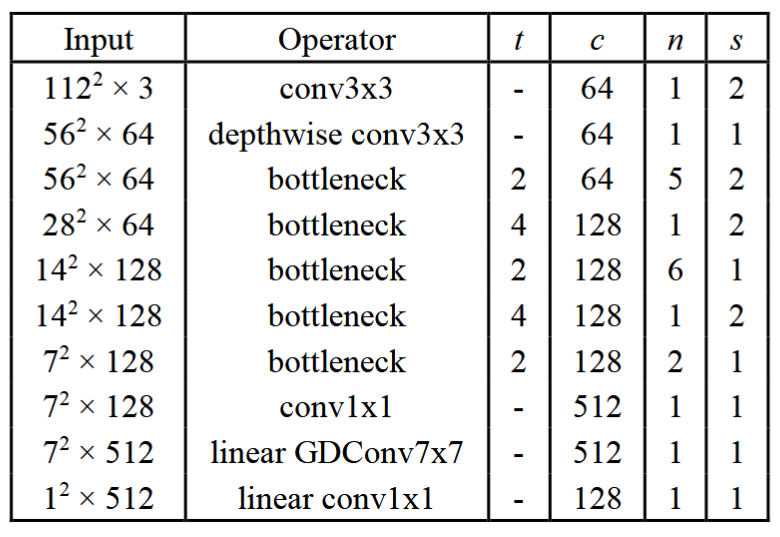
" width="500">
</div>

###Basic building blocks (15 Points)

In [ ]:
class ConvBNPReLU(nn.Module):
    """Conv + BatchNorm + PReLU"""
    def __init__(self, in_c, out_c, k=3, s=1, p=1, groups=1):
        super().__init__()
        # To DO
        self.conv = nn.Conv2d(in_c, out_c, k, s, p, groups=groups, bias=False)
        self.bn = nn.BatchNorm2d(out_c)
        self.prelu = nn.PReLU(out_c)

    def forward(self, x):
        # To DO
        x = self.conv(x)
        x = self.bn(x)
        x = self.prelu(x)
        return x

class ConvBN(nn.Module):
    """1x1 Conv + BatchNorm (no activation)"""
    def __init__(self, in_c, out_c):
        super().__init__()
        # To DO
        self.conv = nn.Conv2d(in_c, out_c, 1, 1, 0, bias=False)
        self.bn = nn.BatchNorm2d(out_c)

    def forward(self, x):
        # To DO
        x = self.conv(x)
        x = self.bn(x)
        return x


class LinearBottleneck(nn.Module):
    """
    Inverted residual block with linear bottleneck.
    - expand_ratio: expansion factor
    - stride: depthwise stride
    """
    def __init__(self, in_c, out_c, expand_ratio, stride):
        super().__init__()
        # TO DO
        self.use_residual = in_c == out_c and stride == 1

        hidden_dim = int(in_c * expand_ratio)
        hidden_dim = max(hidden_dim, 1)

        layers = []

        if expand_ratio != 1:
            layers.append(ConvBNPReLU(in_c, hidden_dim, 1, 1, 0))

        layers.append(ConvBNPReLU(hidden_dim, hidden_dim, 3, stride, 1, groups=hidden_dim))
        layers.append(ConvBN(hidden_dim, out_c))

        self.block = nn.Sequential(*layers)

    def forward(self, x):
        # TO DO
        if self.use_residual:
            out = self.block(x) + x
        else:
            out = self.block(x)
        return out

### MobileFaceNet Model (25 Points)

In [ ]:
class MobileFaceNet(nn.Module):
    """
    MobileFaceNet architecture
    Input: 112x112 RGB
    Output: L2-normalized 512-dim embedding
    """
    def __init__(self, embedding_size=512, multiplier=1.0):
        super().__init__()
        self.embedding_size = embedding_size

        # Initial layers
        in_channels = 3
        out_channels = int(64 * multiplier)
        self.conv1 = ConvBNPReLU(in_channels, out_channels, 3, 2, 1)

        # Depthwise separable convolutions
        self.dw_conv1 = ConvBNPReLU(out_channels, out_channels, 3, 1, 1, groups=out_channels)

        # Pointwise convolution
        self.pw1 = ConvBNPReLU(out_channels, int(64 * multiplier), 1, 1, 0)

        # Bottleneck configuration
        self.bottleneck_cfg = [
            (2, 64, 5, 2),    # t, c, n, s
            (4, 128, 1, 2),
            (2, 128, 6, 1),
            (4, 128, 1, 2),
            (2, 128, 2, 1),
        ]

        layers = []
        in_c = int(64 * multiplier)
        for t, c, n, s in self.bottleneck_cfg:
            c = int(c * multiplier)
            for i in range(n):
                stride = s if i == 0 else 1
                layers.append(LinearBottleneck(in_c, c, t, stride))
                in_c = c

        self.bottlenecks = nn.Sequential(*layers)

        # Conv after bottlenecks
        conv_after_out = int(512 * multiplier)
        self.conv2 = ConvBNPReLU(in_c, conv_after_out, k=1, s=1, p=0)

        # Global depthwise convolution (kernel=7 conv)
        # Note: Input spatial size should be 7x7 at this point for kernel=7
        self.dw7 = ConvBNPReLU(conv_after_out, conv_after_out, k=7, s=1, p=0, groups=conv_after_out)

        # Final 1x1 conv (equivalent to linear layer)
        self.conv3 = ConvBN(conv_after_out, 512)

        # Adaptive average pooling to ensure fixed spatial size
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))

        # Final embedding layers
        self.fc = nn.Linear(512, embedding_size, bias=False)
        self.bn = nn.BatchNorm1d(embedding_size)

        self._initialize_weights()

    def forward(self, x, l2_norm=True):
        # Forward pass
        x = self.conv1(x)
        x = self.dw_conv1(x)
        x = self.pw1(x)

        x = self.bottlenecks(x)
        x = self.conv2(x)

        # Global depthwise convolution (7x7 spatial to 1x1)
        x = self.dw7(x)

        # Final pointwise convolution
        x = self.conv3(x)

        # Adaptive average pooling to ensure 1x1 spatial dimensions
        x = self.avgpool(x)     # (batch_size, 512, 1, 1)

        # Flatten
        x = x.view(x.size(0), -1)  # Should be (batch_size, 512)

        # Single linear layer to get embedding
        x = self.fc(x)          # (batch_size, 512) -> (batch_size, embedding_size)
        x = self.bn(x)

        # L2 normalization
        if l2_norm:
            x = F.normalize(x, p=2, dim=1)

        return x

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out')
                if m.bias is not None:
                    nn.init.zeros_(m.bias)
            elif isinstance(m, nn.Linear):
                nn.init.xavier_normal_(m.weight)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)
            elif isinstance(m, (nn.BatchNorm2d, nn.BatchNorm1d)):
                nn.init.ones_(m.weight)
                nn.init.zeros_(m.bias)

###Sanity Check

In [ ]:
if __name__ == "__main__":
    model = MobileFaceNet().to(device)
    dummy = torch.randn(2, 3, 112, 112).to(device)
    out = model(dummy)
    print("Output shape:", out.shape)

Output shape: torch.Size([2, 512])


##ArcFace Loss

ArcFace is a margin-based loss function specifically designed for face recognition tasks. Unlike traditional softmax loss, which only encourages correct classification, ArcFace explicitly maximizes the angular margin between embeddings of different identities. This results in highly discriminative feature vectors that are better separated in the embedding space, which is crucial for high-accuracy face verification.

In this assignment, using ArcFace is particularly important because the network is lightweight and has fewer parameters compared to large-scale face recognition models. By applying an angular margin, ArcFace helps the model learn embeddings that are both compact and highly discriminative, ensuring that even a small network can achieve competitive performance on face verification or identification tasks.

<div style="text-align: center;">
    <img src="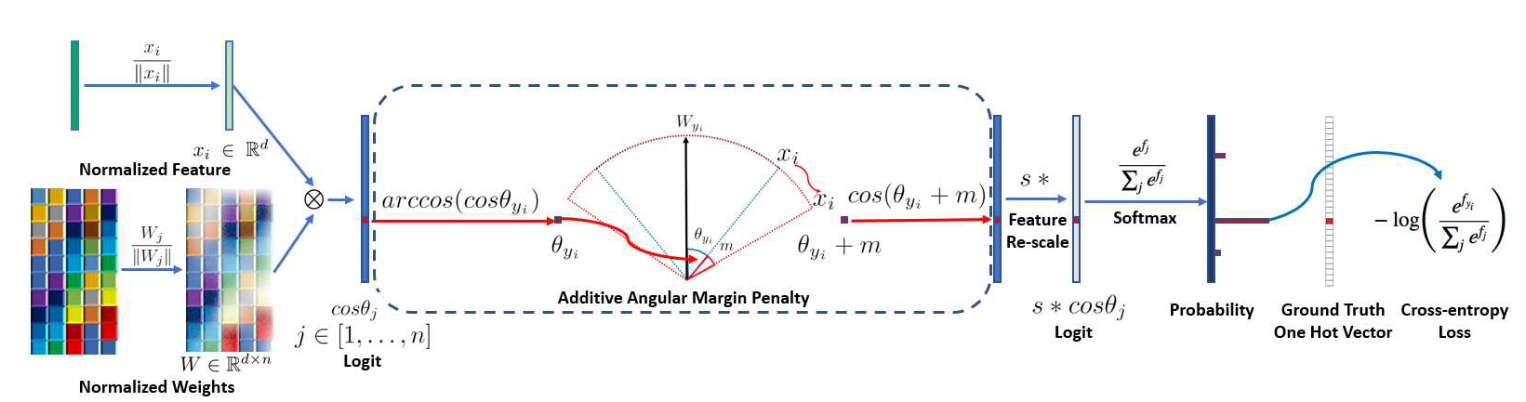
" width="950">
</div>

Let $\mathbf{x}_i$ be the feature embedding of the $i$-th input image, and $\mathbf{W}$ be the weights of the last fully connected layer before softmax. First, both the embedding and the weights are normalized:

$$
\|\mathbf{W}_j\| = 1, \quad \|\mathbf{x}_i\| = 1
$$

The logits for class $j$ are computed as the cosine of the angle between the embedding and the class weight vector:

$$
\cos\theta_j = \mathbf{W}_j^\top \mathbf{x}_i
$$

ArcFace introduces an additive angular margin $m$ to the target logit:

$$
\cos(\theta_{y_i} + m)
$$

where $y_i$ is the ground-truth class for the $i$-th sample. The modified softmax loss becomes:

$$
L = -\frac{1}{N} \sum_{i=1}^{N} \log \frac{e^{s \cdot \cos(\theta_{y_i}+m)}}{e^{s \cdot \cos(\theta_{y_i}+m)} + \sum_{j \ne y_i} e^{s \cdot \cos\theta_j}}
$$


Here, $s$ is a scaling factor that controls the magnitude of the logits, which stabilizes training.

For more information, please refer to the paper: <br>
 [ArcFace: Additive Angular Margin Loss for Deep Face Recognition (2018)](https://openaccess.thecvf.com/content_CVPR_2019/papers/Deng_ArcFace_Additive_Angular_Margin_Loss_for_Deep_Face_Recognition_CVPR_2019_paper.pdf)

In [ ]:
class ArcMarginProduct(nn.Module):
    """
    ArcFace: Additive Angular Margin Loss
    Input: embeddings (B, embedding_size), labels (B)
    Output: logits (B, num_classes) for CrossEntropyLoss
    """
    def __init__(self, embedding_size=512, num_classes=10000, s=64.0, m=0.5, easy_margin=False):
        """
        embedding_size: size of input embeddings (default 512)
        num_classes: number of identities/classes in dataset
        s: scaling factor for logits
        m: additive angular margin (in radians)
        easy_margin: True/False, see ArcFace paper for more info
        """
        super().__init__()
        self.embedding_size = embedding_size
        self.num_classes = num_classes
        self.s = s
        self.m = m
        self.easy_margin = easy_margin

        # Weight parameter (class centers), initialized randomly
        self.weight = nn.Parameter(torch.FloatTensor(num_classes, embedding_size))
        nn.init.xavier_uniform_(self.weight)

        # Cosine and sine of margin
        self.cos_m = math.cos(m)
        self.sin_m = math.sin(m)
        self.th = math.cos(math.pi - m)
        self.mm = math.sin(math.pi - m) * m

    def forward(self, embeddings, labels):
        """
        embeddings: L2-normalized embeddings from MobileFaceNet (B, embedding_size)
        labels: ground-truth class indices (B,)
        """
        # normalize weight
        W = F.normalize(self.weight, p=2, dim=1)

        # cosine similarity
        cosine = F.linear(embeddings, W)
        sine = torch.sqrt(1.0 - torch.clamp(cosine**2, 0, 1))

        # cos(theta + m)
        phi = cosine * self.cos_m - sine * self.sin_m

        if self.easy_margin:
            phi = torch.where(cosine > 0, phi, cosine)
        else:
            phi = torch.where(cosine > self.th, phi, cosine - self.mm)

        # one-hot encode labels
        one_hot = torch.zeros_like(cosine)
        one_hot.scatter_(1, labels.view(-1, 1), 1.0)

        # combine target and non-target logits
        output = (one_hot * phi) + ((1.0 - one_hot) * cosine)
        output = output * self.s

        return output

##Data loader

###Choosing an Appropriate Training Dataset
Selecting a suitable training dataset is a critical step when training MobileFaceNet from scratch, especially when using ArcFace as the loss function. ArcFace requires multiple samples per identity in order to learn discriminative angular margins; therefore, both the number of classes and the number of images per class directly affect model performance.

A commonly recommended dataset for this assignment is CASIA-WebFace. This dataset contains approximately 494,000 images from 10,575 identities, which provides a strong balance between dataset size and diversity. It is large enough to train ArcFace-based models meaningfully but still manageable in this asignment. CASIA-WebFace also has good identity distribution, making it suitable for learning margin-based losses like ArcFace that depend on intra-class variation.

For more information about this dataset, please refer to the paper: <br>
 [Learning Face Representation from Scratch (2014)](https://arxiv.org/pdf/1411.7923)


 Selecting a suitable training dataset is ultimately up to you, and you are free to choose whichever dataset best matches your computational resources. What matters most is the final performance of your model in Questions 2 and 3. For example, if you decide to use a small dataset such as [LFW](https://www.kaggle.com/datasets/jessicali9530/lfw-dataset), it includes only around 13,000 images of 5,749 individuals, and most identities contain only one or two images. This makes LFW unsuitable as a primary training set for ArcFace, since the loss function requires multiple samples per class to properly learn angular margins. If you still choose to train on LFW, you will need to apply strong data augmentation to artificially increase the number of samples per identity. Even with augmentation, the model’s final accuracy during evaluation is expected to be lower because of the limited intra-class diversity and insufficient number of images per identity. If you want to use the LFW dataset for training, you need to split the data into test and training sets, as LFW dataset will be used to report model evolution metrics in this assignment.

Your training dataset is:CASIA-WebFace


Download link: https://drive.usercontent.google.com/download?id=1KxNCrXzln0lal3N4JiYl9cFOIhT78y1l&export=download&authuser=0

###Extract dataset from Google Drive (optional)

In [ ]:
import zipfile
zip_path = "/content/drive/MyDrive/faces_webface_112x112.zip"
#zip_path = "/content/drive/MyDrive/Colab Notebooks/dataset_train.zip"
extract_path = "/content/dataset_train"

if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall("/content/")
    print("Dataset extracted.")
else:
    print("Dataset already extracted.")

Dataset extracted.


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ntl0601/casia-webface")

print("Path to dataset files:", path)

100%|██████████| 2.53G/2.53G [02:02<00:00, 22.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ntl0601/casia-webface/versions/1


###Dataset Class (20 Points)

In [ ]:
from PIL import Image
from PIL.Image import Transpose
from torch.utils.data import Dataset
import random
import torchvision.transforms as transforms

In [ ]:
class DatasetCSV(Dataset):
    def __init__(self, txt_path, transform):
        self.base_path = '/'.join(txt_path.split('/')[:-1])
        lines = open(txt_path).readlines()
        self.lines = [line for line in lines if line.strip()]
        self.transform = transform

        self._classes = None
        self._class_to_idx = None

    @property
    def classes(self):
        """Get all unique class labels"""
        if self._classes is None:
            self._classes = sorted(set([int(line.split()[0]) for line in self.lines]))
        return self._classes

    @property
    def class_to_idx(self):
        """Get mapping from class label to index"""
        if self._class_to_idx is None:
            self._class_to_idx = {cls: idx for idx, cls in enumerate(self.classes)}
        return self._class_to_idx

    def __len__(self):
        return len(self.lines)

    def __getitem__(self, index):
        image_path = '/'.join(self.lines[index].split()[1].split('/')[1:])
        image_path = self.base_path + '/casia-webface/' + image_path

        original_label = int(self.lines[index].split()[0])

        y = self.class_to_idx[original_label]

        image = Image.open(image_path)

        if self.transform:
            image = self.transform(image)
        return image, y

base_transform = transforms.Compose([
    transforms.Resize((112, 112)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

###Create Datasets

In [ ]:
dataset_path = '/root/.cache/kagglehub/datasets/ntl0601/casia-webface/versions/1/casia-webface'

train_dataset = DatasetCSV('/root/.cache/kagglehub/datasets/ntl0601/casia-webface/versions/1/casia-webface.txt',transform=base_transform)

print(f"Number of training samples: {len(train_dataset)}")

Number of training samples: 460412


###Save Augmented Images (optional and recommended)

In [ ]:
"""""
Important Note: In this implementation, data augmentation is applied when saving the dataset.
You may choose to perform this step in this cell or in any of the previous cells.
"""""
def save_augmented_images(dataset, save_root, num_augments= ): #choose num_augments
    os.makedirs(save_root, exist_ok=True)
    idx_to_class = {v: k for k, v in dataset.class_to_idx.items()}

    for idx in tqdm(range(len(dataset)), desc="Saving images"):
        img_orig, label = dataset[idx]
        person_name = idx_to_class[label]
        person_dir = os.path.join(save_root, person_name)
        os.makedirs(person_dir, exist_ok=True)

        # Convert original tensor to PIL Image
        # TO DO

        # Save original image
        orig_save_path = os.path.join(person_dir, f"{idx}_orig.jpg")
        img_pil.save(orig_save_path)

        # augmentinon transformer
        # TO DO, see Important Note

        # Generate augmented versions
        # TO DO, see Important Note

            aug_save_path = os.path.join(person_dir, f"{idx}_aug{i}.jpg")
            aug_pil.save(aug_save_path)

##Dataset Visualization (10 Points)
Display at least four images from the training dataset (after augmentation).

Number of people: 10572


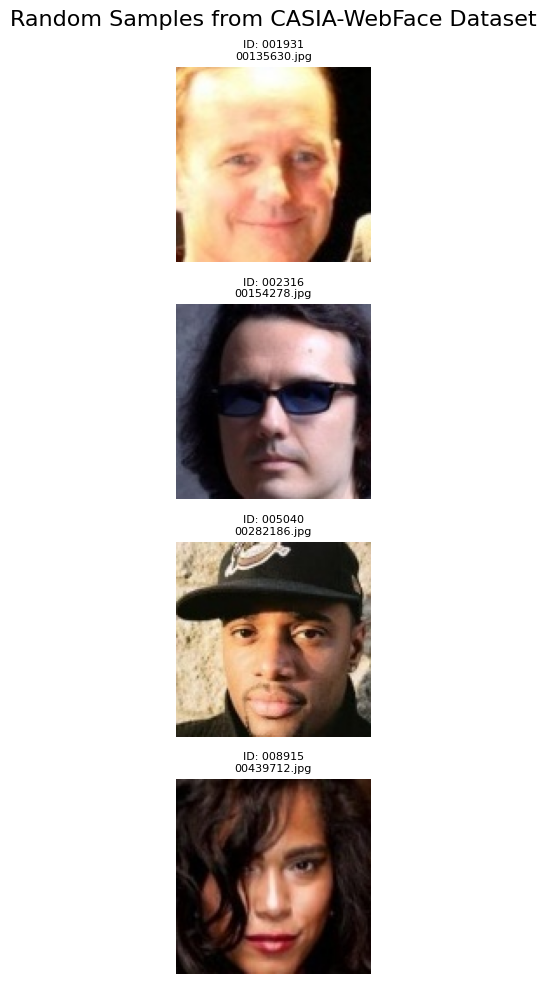

In [ ]:
identities = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
print(f'Number of people: {len(identities)}')
plt.figure(figsize=(15, 10))
plt.suptitle("Random Samples from CASIA-WebFace Dataset", fontsize=16)

n_person = 4
n_img = 1
sub_plot = 0

for _ in range(n_person):
    identity = random.choice(identities)
    identity_path = os.path.join(dataset_path, identity)

    image_files = [f for f in os.listdir(identity_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    if not image_files:
        continue

    image_files = random.sample(image_files, n_img)

    for image_file in image_files:
        image_path = os.path.join(identity_path, image_file)

        img = Image.open(image_path)

        sub_plot += 1
        plt.subplot(n_person, n_img, sub_plot)
        plt.imshow(img)
        plt.title(f"ID: {identity}\n{image_file}", fontsize=8)
        plt.axis('off')

plt.tight_layout()
plt.show()

##Train (40 Points)

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
# Convert images to tensor and normalize to [-1,1]
transform = transforms.Compose([
    transforms.Resize((112, 112)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])


# Load dataset
train_dir = "/content/drive/MyDrive/Colab Notebooks/dataset_train_processed"

#train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)

# DataLoader
batch_size = 32
num_workers = 2
pin_memory = True if torch.cuda.is_available() else False
train_loader = DataLoader(
    train_dataset,
    batch_size= batch_size ,      # Choose batchsize
    shuffle=True,
    num_workers= num_workers,      # Choose number of workers (at least 2 worker recommended)
    pin_memory=pin_memory ,
    persistent_workers=True
)

In [ ]:
print(len(train_dataset.classes))

10537


In [ ]:
# Print dataset info
print(f"Number of classes: {len(train_dataset.classes)}")
print(f"Number of images: {len(train_dataset)}")
print("Some class names:", train_dataset.classes[:5])

# Check a batch
images, labels = next(iter(train_loader))
print("Batch images shape:", images.shape)
print("Batch labels shape:", labels.shape)

Number of classes: 10537
Number of images: 460412
Some class names: [0, 1, 2, 3, 4]
Batch images shape: torch.Size([32, 3, 112, 112])
Batch labels shape: torch.Size([32])


In [ ]:
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm
import torch.optim as optim

In [ ]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [ ]:
# Set Hyperparameters, Model and ArcFaceLoss
num_train_classes = len(train_dataset.class_to_idx)
model = MobileFaceNet(embedding_size=512).to(device)
arcface_loss = ArcMarginProduct(
    embedding_size=512,
    num_classes = num_train_classes,
    s= 15.0,               #choose hyperparameter
    m= 0.1,               #choose hyperparameter
    easy_margin=False        #choose
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(list(model.parameters()) + list(arcface_loss.parameters()), lr=0.001 ) #choose hyperparameter

num_epochs = 1          #choose hyperparameter


# Store metrics for plotting
train_losses = []
train_accs = []

# Training loop
for epoch in range(num_epochs):
    # TO DO
    model.train()
    arcface_loss.train()

    running_loss = 0.0
    running_corrects = 0
    total_samples = 0

    loop = tqdm(train_loader, desc=f"Epoch [{epoch+1}/{num_epochs}]")
    # TO DO
    for batch_idx, (inputs, labels) in enumerate(loop):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        embeddings = model(inputs)
        logits = arcface_loss(embeddings, labels)

        loss = criterion(logits, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(logits, 1)
        running_corrects += torch.sum(preds == labels.data)
        total_samples += inputs.size(0)

        loop.set_postfix({
            'loss': loss.item(),
            'acc': torch.sum(preds == labels.data).item() / inputs.size(0)
        })
    epoch_loss = running_loss / total_samples
    epoch_acc = running_corrects.double() / total_samples

    train_losses.append(epoch_loss)
    train_accs.append(epoch_acc.cpu().item())

    print(f"Epoch {epoch+1}: Loss={epoch_loss:.4f}, Acc={epoch_acc:.2f}%")
    torch.save(model.state_dict(), f"mobilefacenet_epoch{epoch+1}.pth")

Epoch [1/1]: 100%|██████████| 14388/14388 [18:03<00:00, 13.28it/s, loss=4.62, acc=0.429]


Epoch 1: Loss=6.4416, Acc=0.18%


In [ ]:
def preform_epochs(num_epochs,learing_rate):
  optimizer = optim.Adam(list(model.parameters()) + list(arcface_loss.parameters()), lr=learning_rate )
  for epoch in range(num_epochs):
    # TO DO
    model.train()
    arcface_loss.train()

    running_loss = 0.0
    running_corrects = 0
    total_samples = 0

    loop = tqdm(train_loader, desc=f"Epoch [{epoch+1}/{num_epochs}]")
    # TO DO
    for batch_idx, (inputs, labels) in enumerate(loop):
        inputs, labels = inputs.to(device), labels.to(device)


        optimizer.zero_grad()

        embeddings = model(inputs)
        logits = arcface_loss(embeddings, labels)

        loss = criterion(logits, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(logits, 1)
        running_corrects += torch.sum(preds == labels.data)
        total_samples += inputs.size(0)

        loop.set_postfix({
            'loss': loss.item(),
            'acc': torch.sum(preds == labels.data).item() / inputs.size(0)
        })
    epoch_loss = running_loss / total_samples
    epoch_acc = running_corrects.double() / total_samples

    train_losses.append(epoch_loss)
    train_accs.append(epoch_acc.cpu().item())

    print(f"Epoch {epoch+1}: Loss={epoch_loss:.4f}, Acc={epoch_acc:.2f}%")
    torch.save(model.state_dict(), f"mobilefacenet_epoch{epoch+1}.pth")

In [ ]:
epochs = 1
learning_rate = 0.001
preform_epochs(epochs,learning_rate)

Epoch [1/1]: 100%|██████████| 14388/14388 [18:04<00:00, 13.27it/s, loss=4.69, acc=0.429]


Epoch 1: Loss=4.2665, Acc=0.41%


In [ ]:
epochs = 3
learning_rate = 0.001
preform_epochs(epochs,learning_rate)

Epoch [1/3]: 100%|██████████| 14388/14388 [18:12<00:00, 13.17it/s, loss=4.38, acc=0.464]


Epoch 1: Loss=4.1210, Acc=0.43%


Epoch [2/3]: 100%|██████████| 14388/14388 [18:09<00:00, 13.20it/s, loss=3.72, acc=0.536]


Epoch 2: Loss=4.0734, Acc=0.43%


Epoch [3/3]: 100%|██████████| 14388/14388 [18:10<00:00, 13.20it/s, loss=3.53, acc=0.571]


Epoch 3: Loss=4.0448, Acc=0.44%


In [ ]:
epochs = 3
learning_rate = 0.0005
preform_epochs(epochs,learning_rate)

Epoch [1/3]: 100%|██████████| 14388/14388 [17:58<00:00, 13.34it/s, loss=3.34, acc=0.571]


Epoch 1: Loss=3.9069, Acc=0.49%


Epoch [2/3]: 100%|██████████| 14388/14388 [17:59<00:00, 13.33it/s, loss=3.01, acc=0.536]


Epoch 2: Loss=3.3837, Acc=0.57%


Epoch [3/3]: 100%|██████████| 14388/14388 [18:02<00:00, 13.29it/s, loss=3.82, acc=0.643]


Epoch 3: Loss=3.1063, Acc=0.62%


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = MobileFaceNet().to(device)

# Load the entire checkpoint dictionary
checkpoint = torch.load("/content/drive/MyDrive/final_run/checkpoint.pth")

# Load only the model's state_dict from the checkpoint
model.load_state_dict(checkpoint['model_state_dict'])
model.train()

MobileFaceNet(
  (conv1): ConvBNPReLU(
    (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (prelu): PReLU(num_parameters=64)
  )
  (dw_conv1): ConvBNPReLU(
    (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
    (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (prelu): PReLU(num_parameters=64)
  )
  (pw1): ConvBNPReLU(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (prelu): PReLU(num_parameters=64)
  )
  (bottlenecks): Sequential(
    (0): LinearBottleneck(
      (block): Sequential(
        (0): ConvBNPReLU(
          (conv): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affi

In [ ]:
epochs = 3
learning_rate = 0.0003
preform_epochs(epochs,learning_rate)

Epoch [1/3]: 100%|██████████| 14388/14388 [18:14<00:00, 13.15it/s, loss=3.01, acc=0.75]


Epoch 1: Loss=3.2139, Acc=0.61%


Epoch [2/3]:   9%|▉         | 1359/14388 [01:43<15:36, 13.92it/s, loss=3.46, acc=0.656]

**My GPU limit was reached here**

In [ ]:
checkpoint = {
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'arcface_state_dict': arcface_loss.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'train_losses': train_losses,
        'train_accs': train_accs,
        'num_classes': num_train_classes,
        'epoch_loss': epoch_loss,
    }
CHECKPOINT_PATH = "/content/drive/MyDrive/final_run/checkpoint.pth"
torch.save(checkpoint, CHECKPOINT_PATH)

###Plot training loss and accuracy

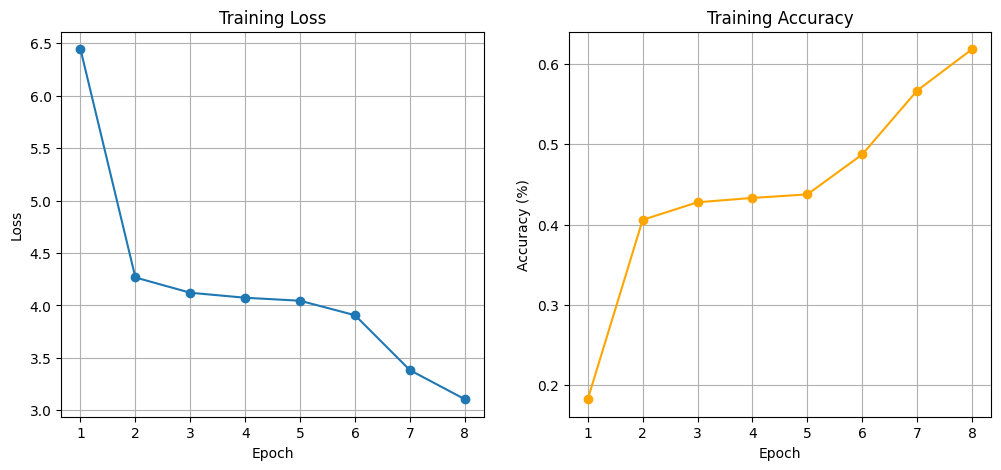

In [ ]:

plt.figure(figsize=(12,5))

# Plot training loss
plt.subplot(1,2,1)
plt.plot(range(1, len(train_losses)+1), train_losses, marker='o')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

# Plot training accuracy
plt.subplot(1,2,2)
plt.plot(range(1, len(train_accs)+1), train_accs, marker='o', color='orange')
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.grid(True)

plt.show()

## Face Verification System (Face Unlock)

In [ ]:
import os
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold
from tqdm import tqdm

Load trained MobileFaceNet model

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = MobileFaceNet().to(device)

# Load the entire checkpoint dictionary
checkpoint = torch.load("/content/drive/MyDrive/final_run/checkpoint.pth")

# Load only the model's state_dict from the checkpoint
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

MobileFaceNet(
  (conv1): ConvBNPReLU(
    (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (prelu): PReLU(num_parameters=64)
  )
  (dw_conv1): ConvBNPReLU(
    (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
    (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (prelu): PReLU(num_parameters=64)
  )
  (pw1): ConvBNPReLU(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (prelu): PReLU(num_parameters=64)
  )
  (bottlenecks): Sequential(
    (0): LinearBottleneck(
      (block): Sequential(
        (0): ConvBNPReLU(
          (conv): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affi

## Load LFW dataset (15 Points)

The [Labeled Faces in the Wild (LFW)](https://www.kaggle.com/datasets/jessicali9530/lfw-dataset) dataset is one of the most influential benchmarks for evaluating face verification models. It contains nearly 13,000 face images of 5,749 individuals, captured in unconstrained, real-world environments. These images include substantial variations in pose, lighting, occlusion, and facial expression, making LFW a challenging and realistic test set for assessing the robustness of face representation models.

In LFW, the evaluation follows the face verification paradigm rather than face identification. The goal of verification is to determine whether two given images belong to the same individual. Since LFW does not provide a sufficient number of images per identity to support classification-based training, its standard protocol relies on using image pairs. Specifically, LFW defines 6,000 fixed pairs—3,000 positive pairs (same person) and 3,000 negative pairs (different people).

A variety of metrics are commonly used to evaluate performance on LFW. The most widely reported metric is verification accuracy, which measures how often the model correctly determines whether two images belong to the same identity. Additional metrics include the ROC curve,  TAR at a fixed FAR, and TPR@FPR=1e-3, which are especially important in security-critical applications.

For more information about this dataset and metrics, please refer to the paper: <br>
 [Labeled Faces in the Wild: A Database forStudying Face
Recognition in Unconstrained Environments (2008)](https://inria.hal.science/inria-00321923/file/Huang_long_eccv2008-lfw.pdf)

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jessicali9530/lfw-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'lfw-dataset' dataset.
Path to dataset files: /kaggle/input/lfw-dataset


In [ ]:
lfw_dir = path + "/lfw-deepfunneled/lfw-deepfunneled"

#Each subfolder = person, each image = a sample

transform = transforms.Compose([
    transforms.Resize((112, 112)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

def load_lfw_embeddings(model, root):
    """
    Loads all images, extracts embeddings using MobileFaceNet,
    and returns a dict: {identity_name: [embedding1, embedding2, ...]}
    """
    embeddings_dict = {}

    for person in sorted(os.listdir(root)):
        person_path = os.path.join(root, person)
        if not os.path.isdir(person_path):
            continue

        person_embeddings = []

        for imgname in os.listdir(person_path):
            img_path = os.path.join(person_path, imgname)

            # Load image
            try:
                img = Image.open(img_path).convert('RGB')
            except:
                print(f"Failed to load image: {img_path}")
                continue

            # Convert to tensor
            img_tensor = transform(img)
            img_tensor = img_tensor.unsqueeze(0).to(device)

            # Extract embedding
            with torch.no_grad():
                emb = model(img_tensor)
                emb = emb.cpu().numpy().squeeze()


            person_embeddings.append(emb)

        if len(person_embeddings) > 0:
            embeddings_dict[person] = np.array(person_embeddings)

        if len(embeddings_dict) % 100 == 0:
            print(f"Processed {len(embeddings_dict)} identities...")

    return embeddings_dict


print("Extracting embeddings from LFW dataset...")
lfw_embeddings = load_lfw_embeddings(model, lfw_dir)
print("Identities loaded:", len(lfw_embeddings))

Extracting embeddings from LFW dataset...
Processed 100 identities...
Processed 200 identities...
Processed 300 identities...
Processed 400 identities...
Processed 500 identities...
Processed 600 identities...
Processed 700 identities...
Processed 800 identities...
Processed 900 identities...
Processed 1000 identities...
Processed 1100 identities...
Processed 1200 identities...
Processed 1300 identities...
Processed 1400 identities...
Processed 1500 identities...
Processed 1600 identities...
Processed 1700 identities...
Processed 1800 identities...
Processed 1900 identities...
Processed 2000 identities...
Processed 2100 identities...
Processed 2200 identities...
Processed 2300 identities...
Processed 2400 identities...
Processed 2500 identities...
Processed 2600 identities...
Processed 2700 identities...
Processed 2800 identities...
Processed 2900 identities...
Processed 3000 identities...
Processed 3100 identities...
Processed 3200 identities...
Processed 3300 identities...
Processed 

##Create Positive and Negative Pairs (15 Points)

In [ ]:
def generate_pairs(emb_dict):
    pos_pairs = []
    neg_pairs = []

    persons = list(emb_dict.keys())

    # Positive pairs
    for person in persons:
        embeddings = emb_dict[person]
        if len(embeddings) < 2:
            continue
        # Take all possible pairs of embeddings for the same person
        for i in range(len(embeddings)):
            for j in range(i + 1, len(embeddings)):
                pos_pairs.append((embeddings[i], embeddings[j], 1)) # 1 for same person

    # Negative pairs
    # To ensure roughly equal number of positive and negative pairs for evaluation, we'll limit neg_pairs
    # This part is a simplification. For rigorous LFW evaluation, one would use predefined pairs list.
    # For this assignment, we aim for a diverse set of negative pairs.
    num_neg_pairs_to_generate = len(pos_pairs) # Try to match the number of positive pairs
    generated_neg_pairs = 0

    while generated_neg_pairs < num_neg_pairs_to_generate:
        person1_idx = random.randint(0, len(persons) - 1)
        person2_idx = random.randint(0, len(persons) - 1)

        person1 = persons[person1_idx]
        person2 = persons[person2_idx]

        if person1 == person2:
            continue

        embeddings1 = emb_dict[person1]
        embeddings2 = emb_dict[person2]

        if len(embeddings1) == 0 or len(embeddings2) == 0:
            continue

        emb1 = random.choice(embeddings1)
        emb2 = random.choice(embeddings2)
        neg_pairs.append((emb1, emb2, 0)) # 0 for different persons
        generated_neg_pairs += 1

    return pos_pairs, neg_pairs


positive_pairs, negative_pairs = generate_pairs(lfw_embeddings)

print("Positive pairs:", len(positive_pairs))
print("Negative pairs:", len(negative_pairs))

Positive pairs: 242257
Negative pairs: 242257


##Compute Similarities (10 Points)

In [ ]:
def cosine_similarity(a, b):
    """
    Computes the cosine similarity of two vectors.
    """
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)

    if norm_a == 0 or norm_b == 0:
        return 0.0

    similarity = dot_product / (norm_a * norm_b)
    return similarity


all_scores = []
all_labels = []

# Combine positive and negative pairs, and extract labels
combined_pairs = positive_pairs + negative_pairs

for emb1, emb2, label in tqdm(combined_pairs, desc="Computing similarities"):
    score = cosine_similarity(emb1, emb2)
    all_scores.append(score)
    all_labels.append(label)

all_scores = np.array(all_scores)
all_labels = np.array(all_labels)

df = pd.DataFrame({'score': all_scores, 'label': all_labels})
df.head(10)

Computing similarities: 100%|██████████| 484514/484514 [00:05<00:00, 84799.65it/s]


,score,label
0,0.877912,1
1,0.913100,1
2,0.791310,1
3,0.877129,1
4,0.725612,1
5,0.733817,1
6,0.855729,1
7,0.877369,1
8,0.620393,1
9,0.564864,1


##LFW Verification Benchmark (15 Points)

In [ ]:
# ROC curve
fpr, tpr, thresholds = roc_curve(all_labels, all_scores)
roc_auc = auc(fpr, tpr)

# Best threshold (e.g., maximize accuracy)
# Find threshold that maximizes (tpr - fpr) for a simple balance, or other criteria
optimal_idx = np.argmax(tpr - fpr)
best_threshold = thresholds[optimal_idx]

print("Best threshold:", best_threshold)

# Compute accuracy at best_threshold
predictions = (all_scores >= best_threshold).astype(int)
accuracy = np.mean(predictions == all_labels) * 100

print("LFW Accuracy:", accuracy)
print("AUC:", roc_auc)

# TPR@FPR=1e-3
# Find the index where FPR is closest to 1e-3
idx = np.where(fpr <= 1e-3)[-1][-1]

print("TPR @ FPR=1e-3:", tpr[idx])

# TAR@FAR
far_list = [1e-2, 1e-3, 1e-4]
for far in far_list:
    # Find the index where FPR is closest to the target FAR
    idx = np.where(fpr <= far)[-1][-1]
    print(f"TAR @ FAR={far}:", tpr[idx])

Best threshold: 0.6661485
LFW Accuracy: 77.13027900122597
AUC: 0.8465303501693879
TPR @ FPR=1e-3: 0.08483139806073715
TAR @ FAR=0.01: 0.24737365690155497
TAR @ FAR=0.001: 0.08483139806073715
TAR @ FAR=0.0001: 0.03185872854035177


##ROC Curve

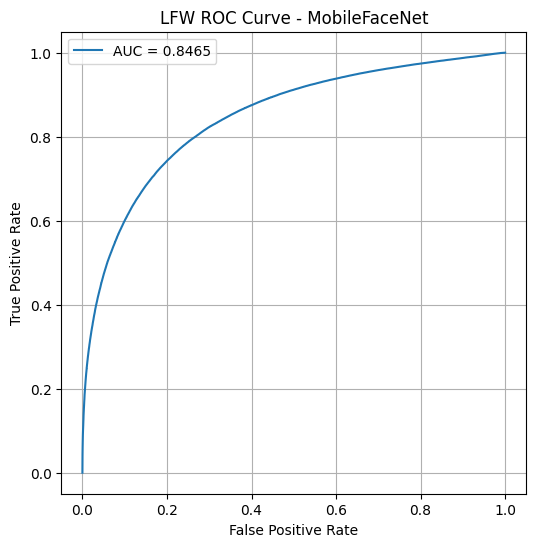

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("LFW ROC Curve - MobileFaceNet")
plt.legend()
plt.grid(True)
plt.show()

##Face Verification (25 Points)
Test your face Verification system by two sample images

In [ ]:
def verify(img_path1, img_path2, threshold=best_threshold):
    # Load images
    img1 = Image.open(img_path1).convert('RGB')
    img2 = Image.open(img_path2).convert('RGB')

    # Preprocess
    # Define a transform that matches the model's training transform
    preprocess_transform = transforms.Compose([
        transforms.Resize((112, 112)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])

    img1_tensor = preprocess_transform(img1).unsqueeze(0).to(device)
    img2_tensor = preprocess_transform(img2).unsqueeze(0).to(device)

    # Embeddings
    model.eval()
    with torch.no_grad():
        emb1 = model(img1_tensor).cpu().numpy().squeeze()
        emb2 = model(img2_tensor).cpu().numpy().squeeze()

    # Similarity
    sim = cosine_similarity(emb1, emb2)
    result = "Same person" if sim >= threshold else "Different persons"

    return sim, result

You may replace imgA and imgB with any other images

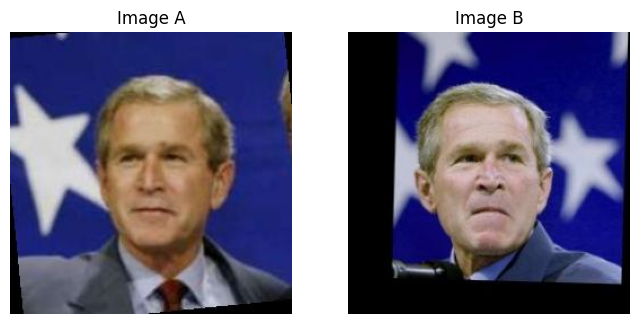

Similarity: 0.8683848
Same person: Same person


In [ ]:
# Example usage:
imgA = lfw_dir+"/George_W_Bush/George_W_Bush_0001.jpg"     # Set the image path
imgB = lfw_dir+"/George_W_Bush/George_W_Bush_0002.jpg"     # Set the image path

# Visualize imgA and imgB
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(Image.open(imgA))
plt.title("Image A")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(Image.open(imgB))
plt.title("Image B")
plt.axis('off')
plt.show()

# Print results
sim, same = verify(imgA, imgB)
print("Similarity:", sim)
print("Same person:", same)